In [1]:
import pandas as pd

In [56]:
data = pd.read_csv('electiondata4.csv')

In [57]:
data.sample(4)

,ref,state,constituency,won status,votes,(votes),Name,Party Name
4831,4832,Telangana,Malkajgiri(7),NaN,13366,( -977676),NOTA,None of the Above
5487,5488,Tamil Nadu,TIRUVANNAMALAI(11),lost,965,( -546414),"KOTHANDABANI, B.",Independent
5209,5210,Tamil Nadu,THENI(33),lost,617,( -570876),SETHUPATHI G,Independent
7112,7113,Gujarat,Vadodara(20),lost,1756,( -871433),NILKANTHKUMAR MANSUKHLAL MISTRI,Independent


In [59]:
data['votes'] = pd.to_numeric(data['votes'], errors='coerce')

C:\Users\saksh\AppData\Local\Temp\ipykernel_1904\425193794.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



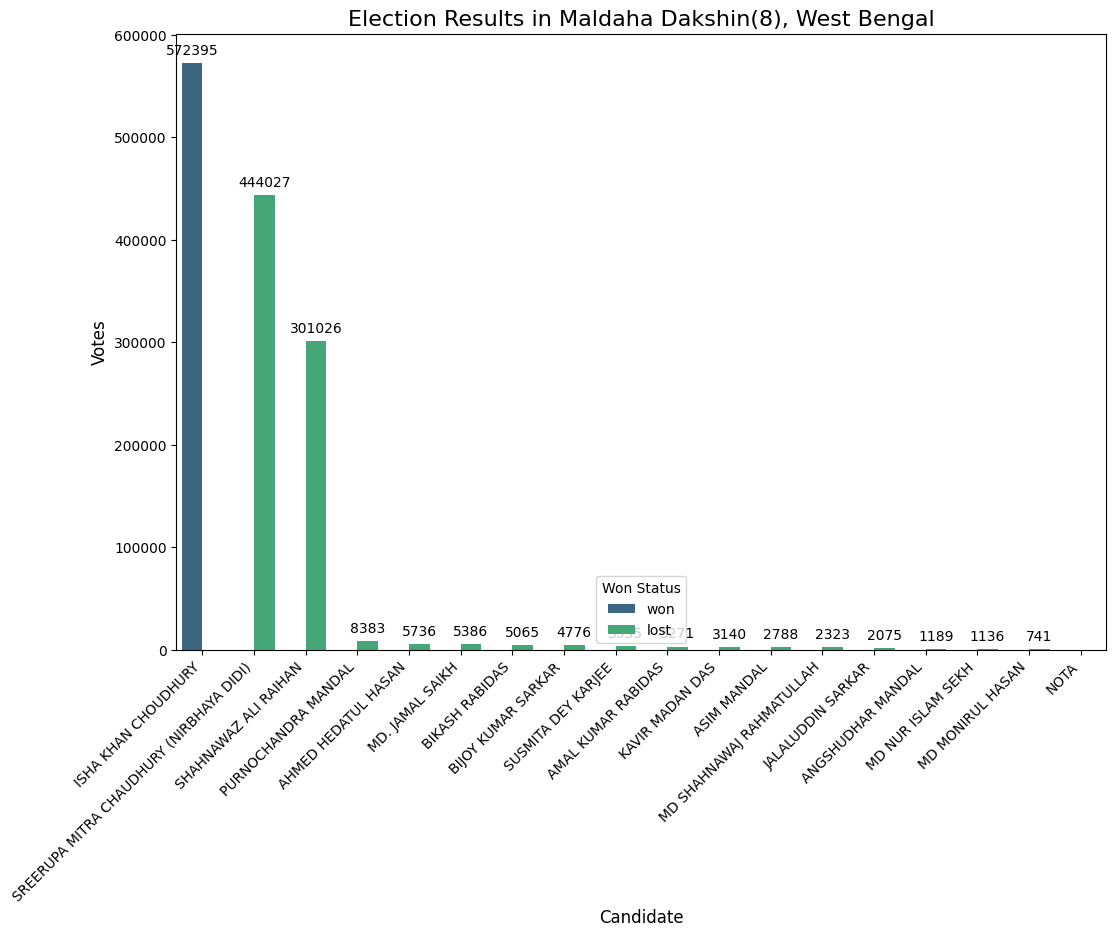

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create a plot for a given state and constituency
def plot_constituency(state, constituency):
    df = data[(data['state'] == state) & (data['constituency'] == constituency)]
    
    # Ensure the 'votes' column is numeric
    df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
    
    plt.figure(figsize=(12, 8))
    
    barplot = sns.barplot(x='Name', y='votes', data=df, hue='won status', palette='viridis')
    
    plt.title(f'Election Results in {constituency}, {state}', fontsize=16)
    plt.xlabel('Candidate', fontsize=12)
    plt.ylabel('Votes', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # Adding annotations to indicate win or loss status
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.0f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = 'center', va = 'center', 
                         xytext = (0, 9), 
                         textcoords = 'offset points')
    
    plt.legend(title='Won Status')
#     st.pyplot(plt)

# Example usage
state = 'West Bengal'
constituency = 'Maldaha Dakshin(8)'
plot_constituency(state, constituency)

